# Working with Real Data

We are going to work with the California Housing Prices dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('housing.csv')
california_img = plt.imread('california.png')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

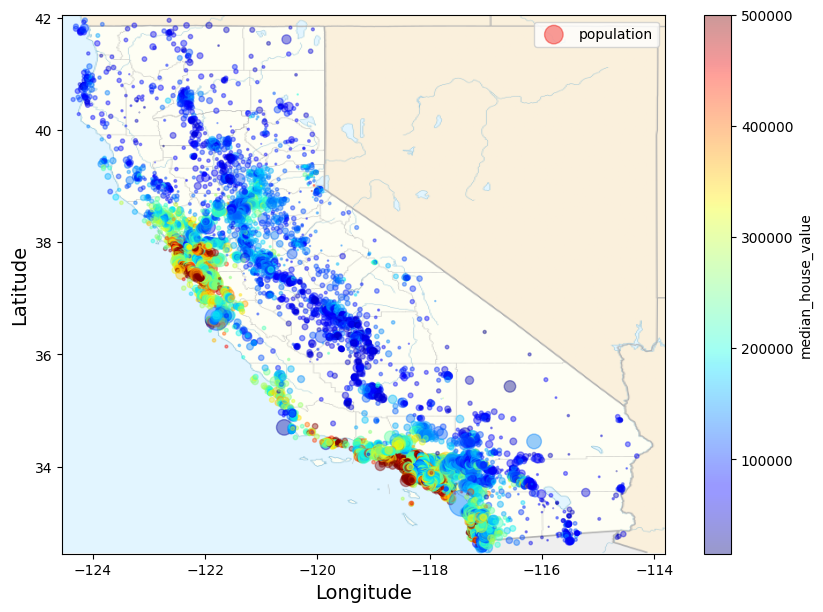

In [11]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=df['population']/100, label='population', figsize=(10,7),
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

### Frame the Problem

- The first question to ask your boss is what exactly is the **business objective**, How does the company expect to use and benefit from this model?
This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it.
- The next question to ask is what the current solution looks like (if any). It will often give you a reference performance, as well as insights on how to solve the problem.
    - Your boss answers that the district housing prices are currently estimated manually by experts (costly and time-consuming, estimates were off by  more than 20%)

With all this information you are now ready to start designing your system.
First, you need to frame the problem: is it supervised, unsupervised, or Reinforcement Learning? Is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques?

- **Supervised:** Given labeled (each instance comes with the expected output "Median house price")
- **Regression:** We are asked to predict a value (multiple regression problem cause we are going to use multiple features to make the prediction, and it is univariate regression since we are only trying to predict a single value for each district)
- **BatchLearning:** There's no new data coming to the system, no need to adjust to changing data rapidly and the data is small to fit in memory

### Select a Performance Measure

Performance measure is a metric used to evaluate how well a model performs on a specific task. A typical performance measure for regression problems is the Root Mean Square Error (RMSE). Is a metric used to measure the difference between predicted values ​​and actual values. RMSE it's very useful, but there some cases that you will prefer use others, if you have a lot of outliers maybe Mean Absolute Error (MAE) would be better, etc.

### Check the Assumptions

Lastly, it is good practice to list and verify the assumptions that were made so far (by you or others); this can catch serious issues early on. Maybe the outputs aren't exactly going to be used in the downstream system, just as regression works, maybe a classification model could have been a better solution, which can save you a lot of time. So talk with the team in charge of the downstream system.

# Quick look at the data

In [12]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

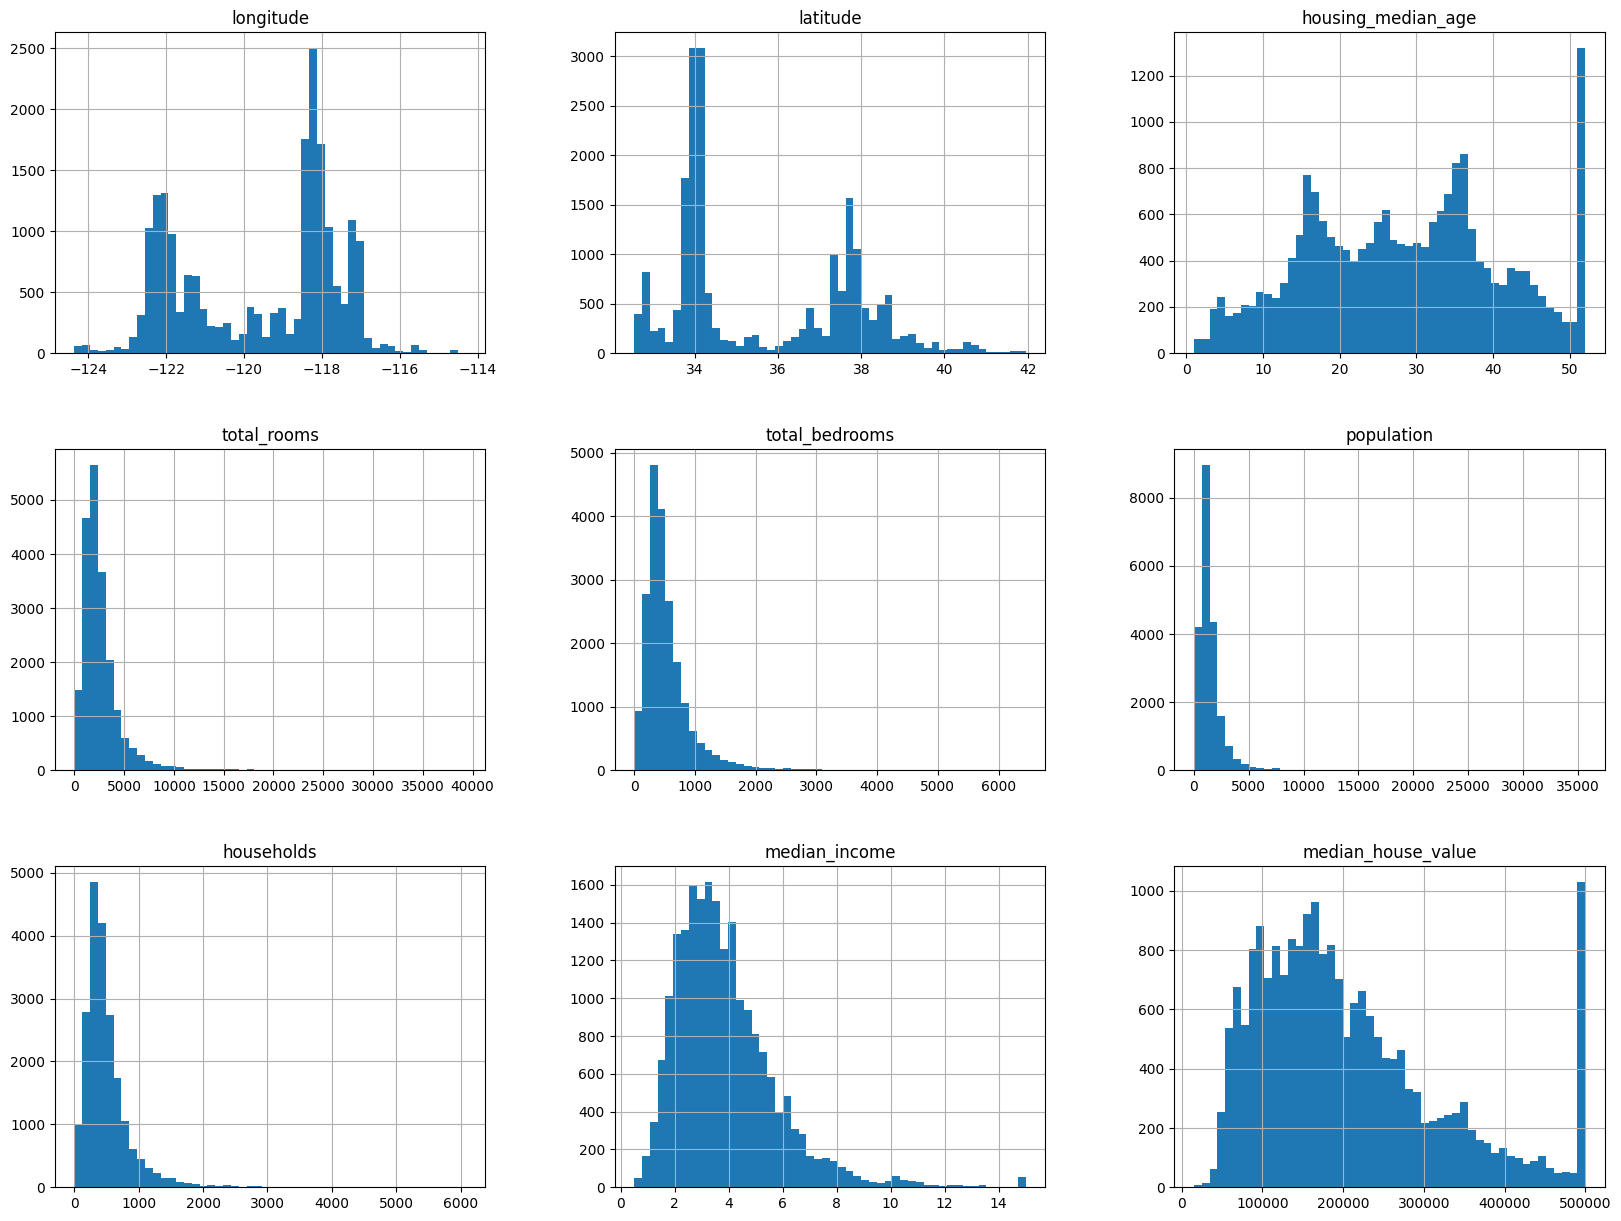

In [13]:
df.hist(bins=50, figsize=(20,15))
plt.show()

- **Median income was capped:** e.g 3 means $30,000, etc
- **housing meadian age and median house value were also capped:** This might be a problem in the future, that's why we got that weird last bar
    - **Solutions:** Collect proper labels for the districts whose labels were capped or Remove those districts from the training set (and also from the test set)
- **Different scales** 

# Create a Test Set

It's a bit strange to set up a test set too early, without looking deeply into the data set, but sometimes we get too invested in it, which could lead us to make bad models or decisions, trying to get patterns where there aren't any.

In [14]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.loc[train_indices], data.loc[test_indices]

# train_set, test_set = split_train_test(df, 0.2)

This is a easy way to split dataset, but it's not perfect at all, the main problem here it's: if you run the program again, it will generate a different test set, there some solutions like, use hashing or adding a index column, a seed with numpy, etc.
But a common solution it's to use the scikit-learn function train_test_split

In [15]:
from sklearn.model_selection import train_test_split
# train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


Those ways are random and good if our data set is large enough, but if it is not, it risks introducing significant sampling bias. In this set we are looking for representative data, and the way to obtain it is to divide the population into homogeneous subgroups (stratified sampling).

<Axes: >

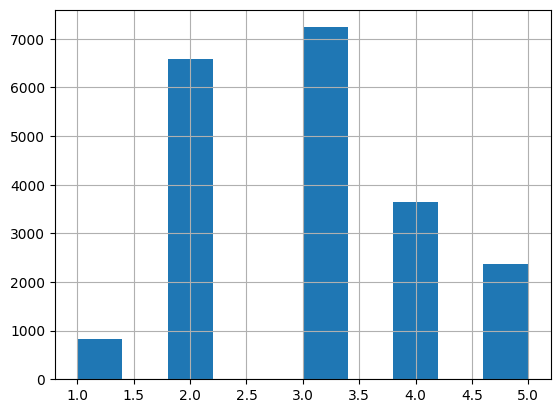

In [16]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
df['income_cat'].hist()

And that is exactly what we are doing here, as we know, median income is a very important characteristic for predicting median house prices, so we will use income_cat as stratified sampling

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [18]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

We spent quite a bit of time on test set generation for a good reason: this is an often neglected but critical part of a Machine Learning project. Moreover, many of these ideas will be useful later when we discuss cross-validation

# Discover and Visualize the Data to Gain Insights
Now let's dig deeper to understand the data, but when using the training set, if the training set is quite large, an exploratory test should be performed, but this is not the case. So let's create a copy of the training set.

In [20]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

Since we got latitude and longitude, it is a good idea to create a scatterplot of all districts to visualize the data

<Axes: xlabel='longitude', ylabel='latitude'>

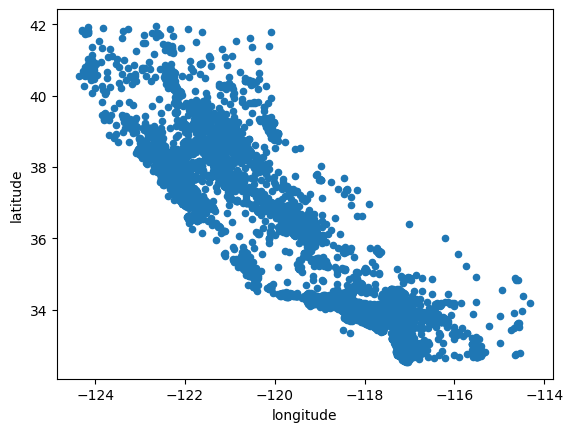

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude')

To make it easier to visualize the places where there is a high density of data point we are going to use alpha=0.1

<Axes: xlabel='longitude', ylabel='latitude'>

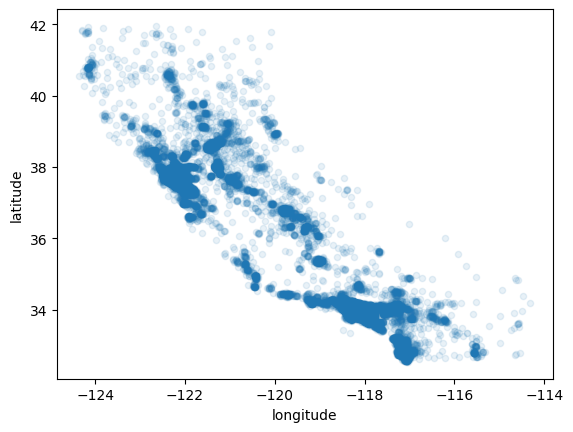

In [22]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

This is better than the other, but we can do it better once again

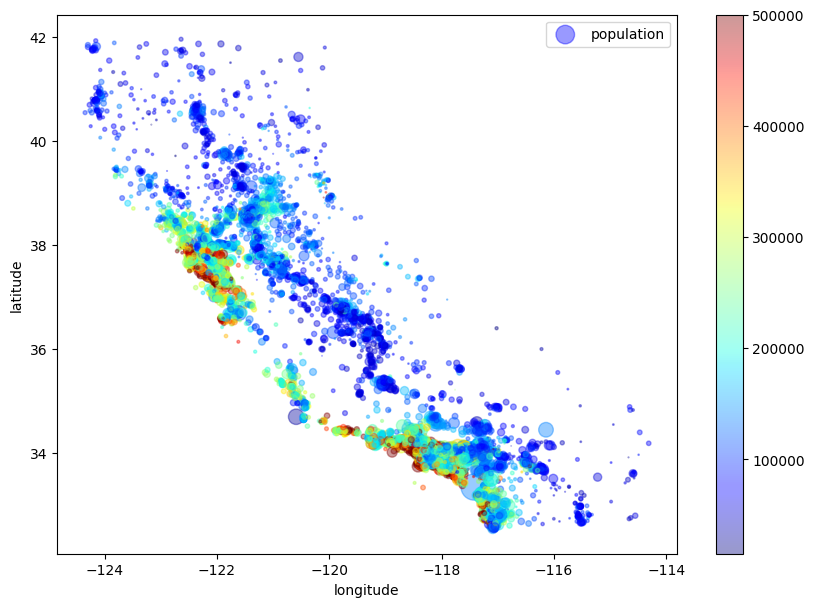

In [26]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=housing['population']/100, label='population', figsize=(10,7),
				c=housing['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

We are using s = district's population, c = color based on the price.
With this we can notice that the proximity to the ocean and the population density are critical features to the house pricing